# **Recomendação de vendas de jogos digitais** 🎮 

José Henrique de Oliveira<br>
[Portfólio](https://joseportfolio.notion.site/Portf-lio-do-Z-308350bb4f4544adb87da2a1a83b8f78) | [LinkedIn](https://www.linkedin.com/in/jholiveira94/)

---

# **Introdução**

A industria de jogos digitais entrega grande volume de produções todos os anos e, como qualquer outro setor, necessita que seus produtos **desempenhem bem no mercado**.<br>
Portanto, **determinar quais nichos de jogos e clientes** trarão tal resultado é essencial para a continuidade dos projetos de uma empresa desse ramo.

Com esse contexto em mente, durante este estudo serão analisadas as vendas de jogos digitais com objetivo de encontrar padrões que auxiliem nessa tomada de decisão tão impactante.<br>
O conjunto de dados escolhido para conduzir essa investigação pode ser encontrado na plataforma Kaggle: [**Video Game Sales**](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

Esse estudo terá como base a metodologia proposta no **CRISP-DM**:
1. Entendendo o negócio
2. Entendendo os dados
3. Preparação dos dados
4. Modelgem
5. Validação
6. Conclusões do estudo

### **Problemas de negócio**

Ao longo desse trabalho, será construído um **modelo de recomendação de lançamento de jogos por região** baseado nos padrões de vendas observados nos dados.<br>
Para tal, serão respondidas questões mais objetivas que auxiliarão a destrinchar o tema elencado.<br>
As perguntas estão agrupadas para facilitar a organização geral do estudo.

##### **Objetivo**

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
<b>Recomendação de gêneros populares por região</b> <br>
Quais gêneros de jogos devem ser lançados em uma região específica para maximizar as vendas?
</div>

##### **Questões norteadoras**
Análise das vendas globais por gênero e plataforma:
- Quais gêneros de jogos têm o maior sucesso em termos de vendas globais?
- Como as vendas variam entre diferentes plataformas para um mesmo gênero de jogo?

Distribuição geográfica das vendas:
- Qual região (América do Norte, Europa, Japão, Outras) é mais forte em termos de vendas para diferentes gêneros ou plataformas?
- Existem padrões regionais nas preferências de gêneros de jogos?

Tendências temporais de lançamento e vendas:
- Como as vendas de jogos mudaram ao longo do tempo?
- Existe uma correlação entre o ano de lançamento e o sucesso de vendas em diferentes regiões?

Impacto da publisher nas vendas:
- Quais publishers têm consistentemente os jogos mais vendidos?
- Existe uma relação entre o publisher e o sucesso regional ou global de um jogo?

Comparação de sucesso entre plataformas:
- Quais plataformas tendem a ter jogos com maiores vendas globais e por região?
- Existe uma diferença significativa nas vendas entre plataformas para jogos do mesmo gênero?

---

# **1. Preparações**

### **1.1 Bibliotecas e programações iniciais**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Filtro de avisos.
import warnings
warnings.filterwarnings('ignore')

'''
Para uma melhor harmonia das visualizações futuras, será definida uma paleta de cores
'''

cores = ["#E8D4F2", "#D8AEE4", "#C56FD9", "#A73ECF", "#8F1EC3", "#7A0AB4", "#6B09A1", "#6a0dad", "#5C0C99", "#4E0B88",  "#420977",  "#3A0566"]
sns.set_palette(cores)
sns.color_palette()

[(0.9098039215686274, 0.8313725490196079, 0.9490196078431372),
 (0.8470588235294118, 0.6823529411764706, 0.8941176470588236),
 (0.7725490196078432, 0.43529411764705883, 0.8509803921568627),
 (0.6549019607843137, 0.24313725490196078, 0.8117647058823529),
 (0.5607843137254902, 0.11764705882352941, 0.7647058823529411),
 (0.47843137254901963, 0.0392156862745098, 0.7058823529411765),
 (0.4196078431372549, 0.03529411764705882, 0.6313725490196078),
 (0.41568627450980394, 0.050980392156862744, 0.6784313725490196),
 (0.3607843137254902, 0.047058823529411764, 0.6),
 (0.3058823529411765, 0.043137254901960784, 0.5333333333333333),
 (0.25882352941176473, 0.03529411764705882, 0.4666666666666667),
 (0.22745098039215686, 0.0196078431372549, 0.4)]

In [63]:
''' 
Função para gráfico de barras horizontais.
'''

def grafico_barra(data_frame, coluna_y, d, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    coluna_y: Coluna do DataFrame que comporá o eixo das ordenadas, entre aspas;
    titulo: Título do gráfico, entre aspas.
    d: distância para valor de cada barra
    '''

    #fig, ax = plt.subplots(figsize = (10, 4))
    #fig.suptitle(titulo, fontsize = 18, ha = 'center', weight='bold', color = '#3A0566', y = 1.05)
    sns.set_theme(style = "white")

    ax = sns.barplot(data = data_frame,  
                    x = data_frame[coluna_y], 
                    y = data_frame.index, 
                    hue = data_frame[coluna_y],
                    palette = cores,
                    legend = False,
                    ax = axs)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.set_xticklabels([])

    for i, vendas in enumerate(data_frame[coluna_y]):
        qtd = f'{vendas:,.0f}'.replace(',','')  
        ax.text(vendas+d, i, qtd, color = '#3A0566', fontsize=10, weight='bold', ha='right', va='center')

    sns.despine(left = True, bottom = True)

    return ax

In [64]:
''' 
Função para boxplot de uma variável.
'''

def boxplot_unico(data_frame, coluna_y, axs):

    ''' 
    data_frame: DataFrame que contém os dados que serão plotados;
    coluna_y: Coluna do DataFrame que comporá o eixo das ordenadas, entre aspas;
    titulo: Título do gráfico, entre aspas.
    '''

    #fig, ax = plt.subplots(figsize = (4, 4))
    #fig.suptitle(titulo, fontsize = 18, ha = 'center', weight='bold', color = '#3A0566', y = 1.05)
    
    sns.set_theme(style = "white")

    ax = sns.boxplot(data = data_frame,  
                    palette = ["#C56FD9"],
                    legend = False,
                    fill = True,
                    linecolor = "#3A0566",
                    ax = axs)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_tick_params(labelsize = 12, labelcolor = '#3A0566')
    ax.set_xticklabels([])

    sns.despine(left = True, bottom = True)

    return ax

### **1.2 Carregando e conhecendo os dados**

In [8]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Nesse conjunto de dados, há os seguintes atributos:

- Rank - Classificação geral das vendas
- Name - Nome do jogo
- Platform - Platforma de lançamento do jogo (PC,PS4, etc.)
- Year - Ano de lançamento do jogo
- Genre - Gênero do jogo
- Publisher - Empresa responsável pela publicação do jogo
- NA_Sales - Vendas na América do Norte (em milhões)
- EU_Sales - Vendas na Europa (em milhões)
- JP_Sales - Vendas no Japão (em milhões)
- Other_Sales - Vendas em outras regiões (em milhões)
- Global_Sales - Total mundial de vendas

Considerando que este estudo está em português, algumas expressões serão traduzidas para melhor localização do estudo.<br>
Segue relação de tradução:

|   **Original**   |    **Tradução**    |
| :----------: | :------------: |
|     Rank     |       -        |
|     Name     |      Nome      |
|   Platform   |   Plataforma   |
|     Year     |      Ano       |
|    Genre     |     Genero     |
|  Publisher   |       -        |
|   NA_Sales   |   Vendas_AN    |
|   EU_Sales   |   Vendas_EU    |
|   JP_Sales   |   Vendas_JP    |
| Other_Sales  | Vendas_Outras  |
| Global_Sales | Vendas_Globais |

As expressões **Rank** e **Platform** não receberão tradução pelo uso comum da comunidade de jogos, mesmo no Brasil.

### **1.3 Adequações iniciais**

In [9]:
'''
Considerando que as colunas Rank e Name trazem informações individualizadas de cada jogo e esse estudo focará em comportamentos agrupados,
essas colunas serão retiradas. As demais permanecerão.
'''

df = df.drop('Name', axis = 1)
df = df.drop('Rank', axis = 1)

In [10]:
''' 
Como colocado na Contextualização, as colunas serão traduzidas.
'''

df.columns = ['Plataforma', 'Ano', 'Genero', 'Publisher', 'Vendas_AN', 'Vendas_EU', 'Vendas_JP', 'Vendas_Outras', 'Vendas_Globais']

In [11]:
''' 
Verificando a tipagem das features e a existência de valores nulos
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plataforma      16598 non-null  object 
 1   Ano             16327 non-null  float64
 2   Genero          16598 non-null  object 
 3   Publisher       16540 non-null  object 
 4   Vendas_AN       16598 non-null  float64
 5   Vendas_EU       16598 non-null  float64
 6   Vendas_JP       16598 non-null  float64
 7   Vendas_Outras   16598 non-null  float64
 8   Vendas_Globais  16598 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

A partir dessas informações, conclui-se que:
- A tipagem da feature Ano pode ser adequada para int.
- Há valores nulos nas features Ano e Publisher. 
    - Já pode-se entender que é uma quantidade insignificante, portanto não atrapalhará o estudo.

In [12]:
''' 
Modificando a tipagem da coluna Ano.
Para isso, os valores NA serão preenchidos por zero.
'''

df['Ano'] = df.Ano.fillna(0)

df['Ano'] = df['Ano'].astype(int)

In [13]:
''' 
Verificando as alterações
'''

df['Ano'].info()

df.head(3)

<class 'pandas.core.series.Series'>
RangeIndex: 16598 entries, 0 to 16597
Series name: Ano
Non-Null Count  Dtype
--------------  -----
16598 non-null  int32
dtypes: int32(1)
memory usage: 65.0 KB


,Plataforma,Ano,Genero,Publisher,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [14]:
''' 
Verificação das plataformas, gêneros e publishers apresentadas nesse conjunto de dados
'''

for c in df[['Plataforma', 'Genero', 'Publisher']]:
    if c in df[['Plataforma', 'Genero']]:
        print(f'A quantidade de valores únicos de {c} é:', df[c].nunique(), '\n')
        print(f'Os valores únicos de {c} são:\n', df[c].unique(), '\n')
        print('-'*85)
    else:
        print(f'A quantidade de valores únicos de {c} é:', df[c].nunique())
        print(f'Em função da quantidade, optou-se por suprimir a lista de valores únicos de {c}.')

A quantidade de valores únicos de Plataforma é: 31 

Os valores únicos de Plataforma são:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

-------------------------------------------------------------------------------------
A quantidade de valores únicos de Genero é: 12 

Os valores únicos de Genero são:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 

-------------------------------------------------------------------------------------
A quantidade de valores únicos de Publisher é: 578
Em função da quantidade, optou-se por suprimir a lista de valores únicos de Publisher.


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

A verificação de valores únicos auxilia para compreender a diversidade das informações presentes no conjunto de dados.<br>
Por exemplo, fica nítido que uma análise individualizada por Plataforma, Gênero ou Publisher é inviável se não houver seleção ou agrupamento desses dados.

Por outro lado, fortalece as questões norteadoras quanto ao estudo de comportamentos generalizados e quanto a buscar valores com maior impacto.

In [15]:
''' 
Verificação geral de estatísticas descritivas do Dataset
'''

df.describe().round(2)

,Ano,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
count,16598.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,1973.65,0.26,0.15,0.08,0.05,0.54
std,254.35,0.82,0.51,0.31,0.19,1.56
min,0.00,0.00,0.00,0.00,0.00,0.01
25%,2003.00,0.00,0.00,0.00,0.00,0.06
50%,2007.00,0.08,0.02,0.00,0.01,0.17
75%,2010.00,0.24,0.11,0.04,0.04,0.47
max,2020.00,41.49,29.02,10.22,10.57,82.74


<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

Considerando que as vendas estão na casa dos milhões, como descrito no **Contexto**, percebe-se com essa análise que a maioria dos jogos não atinge quantidade expressiva de vendas.

Apenas a partir do terceiro quartil encontram-se jogos com ao menos um milhão de cópias vendidas, mesmo olhando para Vendas_Globais, que é a soma das regiões.

### **1.4 Considerações iniciais**

A partir das verificações feitas nesse tópico, constata-se que:
- As questões norteadoras previamente elencadas são coerentes para esse conjunto de dados.
- Analisar comportamentos a partir de agrupamentos, como por região ou gênero, será importante para que dados menos expressivos tenham mais espaço no estudo.

---

# **2. EDA - Análise Exploratória dos Dados**

Nessa etapa, serão aprofundadas as etapas 2 (Entendendo os dados) e 3 (Preparação dos dados) do CRISP-DM.<br>
Para isso, serão realizadas análises univariadas, bivariadas e multivariadas das features presentes no conjunto de dados.

In [16]:
''' 
Retomando o DataFrame após adequações
'''

df.head()

,Plataforma,Ano,Genero,Publisher,Vendas_AN,Vendas_EU,Vendas_JP,Vendas_Outras,Vendas_Globais
0,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### **2.1 Análise univariada das features**

Essa seção será dedicada à análise das variáveis individualmente para aprofundamento do conhecimento sobre o conjunto de dados.<br>
Considerando o número de colunas, será possível estudar todo o conjunto.

Primeiramente serão analisadas as variáveis categóricas, seguidas das numéricas.

#### **Variáveis categóricas**

In [200]:
''' 
Organização dos dados para geração dos gráficos
'''

# Plataformas
todas_plataformas = pd.DataFrame(df['Plataforma'].value_counts().sort_values(ascending = False))
todas_plataformas.reset_index(inplace= True)
top10_plataforma = pd.DataFrame(df['Plataforma'].value_counts().sort_values(ascending = False).head(10))

# Gênero
todos_generos = pd.DataFrame(df['Genero'].value_counts().sort_values(ascending = False))
todos_generos.reset_index(inplace= True)
todos_generos2 = pd.DataFrame(df['Genero'].value_counts().sort_values(ascending = False))

# Publisher
todas_publisher = pd.DataFrame(df['Publisher'].value_counts().sort_values(ascending = False))
todas_publisher.reset_index(inplace= True)
top10_publisher = pd.DataFrame(df['Publisher'].value_counts().sort_values(ascending = False).head(10))

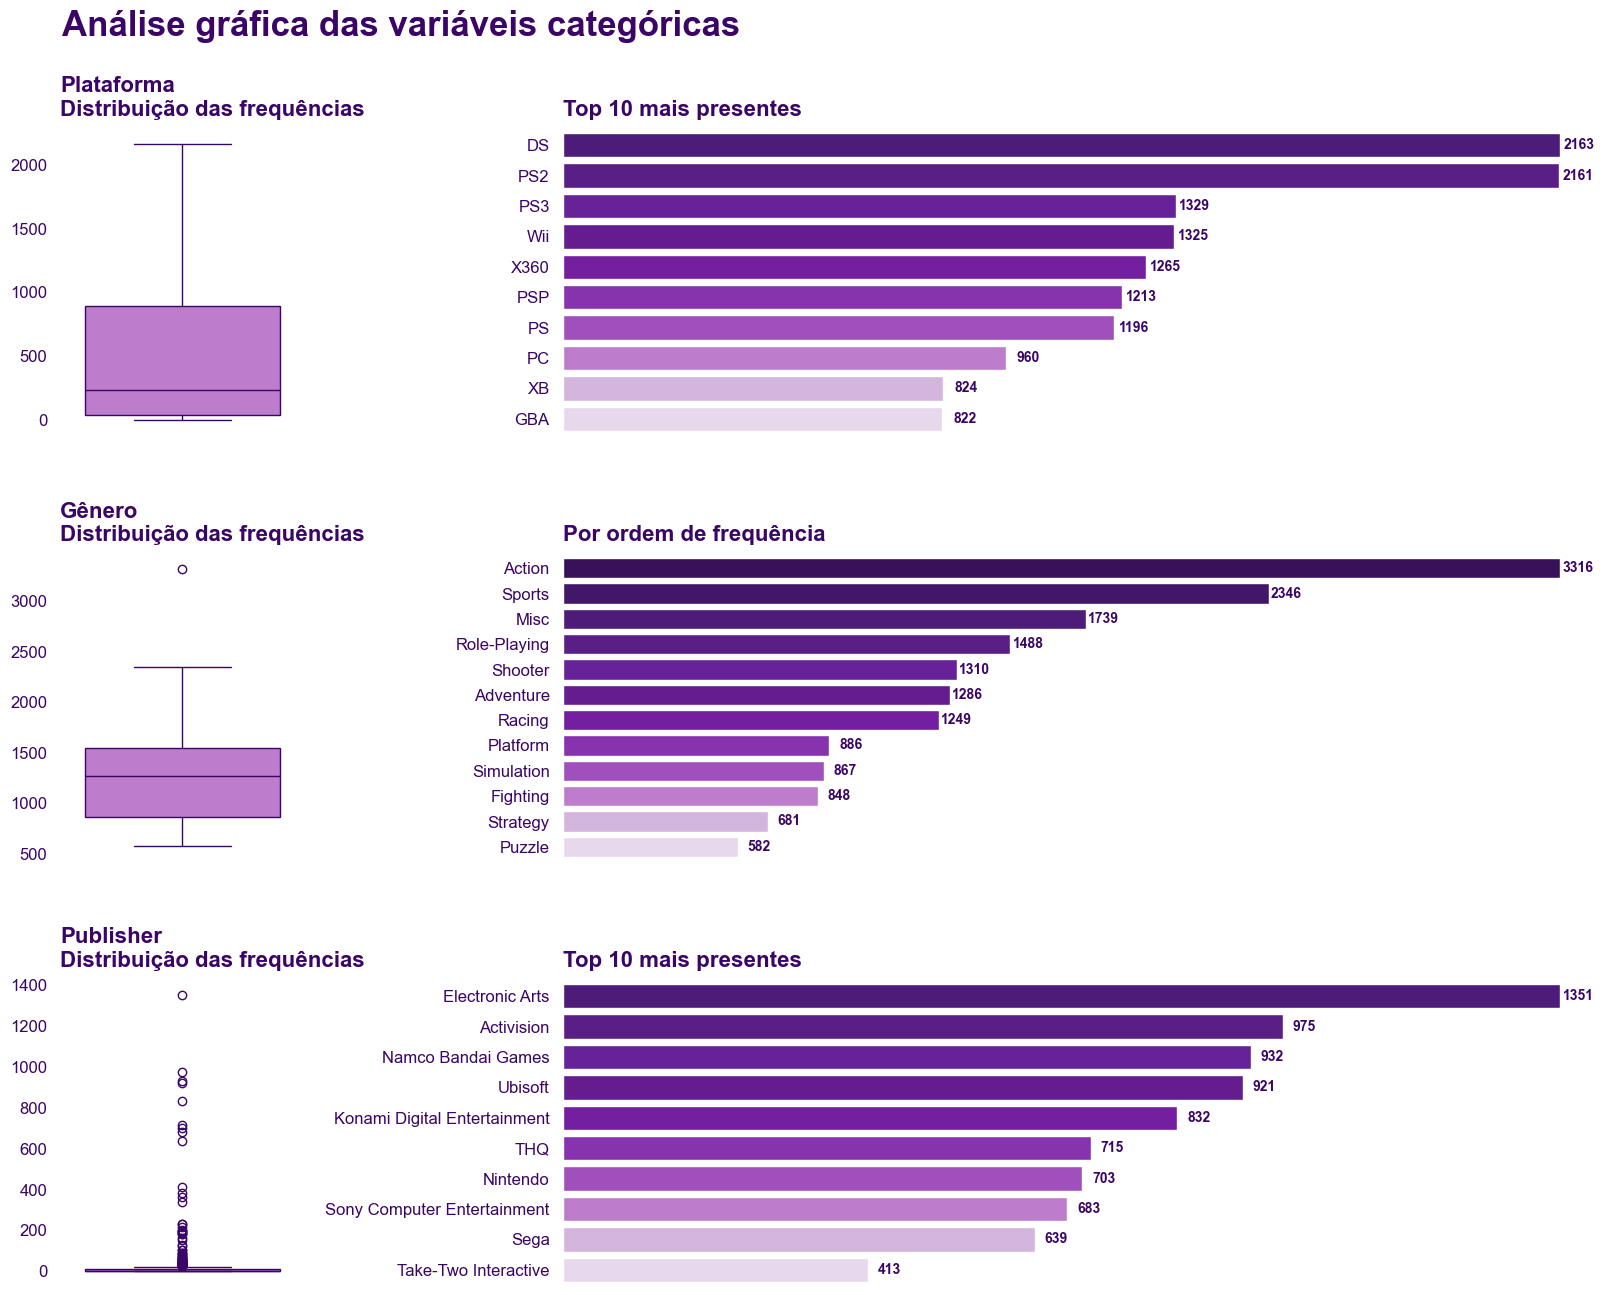

In [221]:
''' 
Construção gráfica para análise das variáveis categóricas
Cada gráfico foi gerado a partir das funções definidas na seção 1. Preparações
'''

fig, axs = plt.subplots(3,2, figsize = (20, 15), gridspec_kw={'width_ratios': [0.7, 3]})

fig.suptitle('Análise gráfica das variáveis categóricas', fontsize = 25, ha = 'left', weight='bold', color = '#3A0566', y = 0.96, x = 0.126)

ax1 = graf_dist_plataforma = boxplot_unico(todas_plataformas, 'count', axs[0,0])
ax1.set_title('Plataforma\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax2 = grafico_barra(top10_plataforma, 'count', 75, axs[0,1])
ax2.set_title('\nTop 10 mais presentes', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax3 = boxplot_unico(todos_generos, 'count', axs[1,0])
ax3.set_title('Gênero\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax4 = grafico_barra(todos_generos2, 'count', 110, axs[1,1])
ax4.set_title('\nPor ordem de frequência ', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax5 = boxplot_unico(todas_publisher, 'count', axs[2,0])
ax5.set_title('Publisher\nDistribuição das frequências', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

ax6 = grafico_barra(top10_publisher, 'count', 45, axs[2,1])
ax6.set_title('\nTop 10 mais presentes', fontsize = 16, ha = 'left', weight='bold', color = '#3A0566', y = 1.02, x = 0)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

<div style="background-color: #6a0dad; color: white; padding: 10px; border-radius: 5px;">
💡 Percepções
</div>

**Quanto às plataformas**
- A distribuição das plataformas está notavelmente desbalanceada, porém é um resultado esperado, visto que com a popularização dos vídeo games ao longo do tempo, poucas empresam mantiveram plataformas ativas.
    - Observando o gráfico de barras, as plataformas presentes no Top 10 pertencem, com exceção da plataforma PC, a apenas três empresas: Nintendo, Sony e Microsoft.
- O estudo comparativo das plataformas e com o ano deverá auxiliar a compreender essa distribuição.
- Vale ressaltar que o Dataset estudado não apresenta todas as vendas de todos os jogos presentes em cada plataforma, o que é um estudo interessante e importante para as empresas. 

**Quanto aos gêneros**
- A distribuição dos gêneros também está desbalanceada e apresenta um resultado esperado, visto que os gêneros mais frequentes possuem uma gama maior de variedades, enquanto que os outros são mais nichados.
- O possível outlier indicado no boxplot pode ser ignorado, visto que Action possui muitos lançamentos comparado aos demais gêneros.
- **Hipótese**: Os jogos de Platform, Simulation, Fighting, Strategy e Puzzle com frequência exigem bastante raciocínio e habilidade, como muitos jogadores buscam jogos por relaxamento, as empresas lançam menos títulos desses gêneros.
    - O Dataset não contempla informações para analisar essa hipótese. 

**Quanto às publishers**


#### **Variáveis numéricas**

### **2.2 Análise bivariada das features**

**Análise das vendas globais por gênero**

In [ ]:
df_top_generos = pd.DataFrame(df.groupby('Genero')['Vendas_Globais'].sum()).sort_values(by = 'Vendas_Globais', ascending = False)

print(f'Quantidade de gêneros de jogos nesse DataFrame: {df_top_generos.index.nunique()}\n')
print('Verificação da estrutura do DataFrame construído:')
df_top_generos.head(3)

Quantidade de gêneros de jogos nesse DataFrame: 12

Verificação da estrutura do DataFrame construído:


,Vendas_Globais
Genero,
Action,1751.18
Sports,1330.93
Shooter,1037.37


<Axes: >

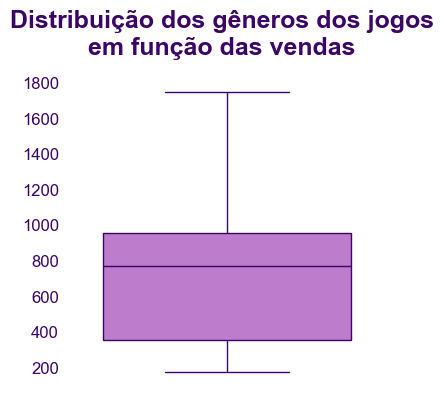

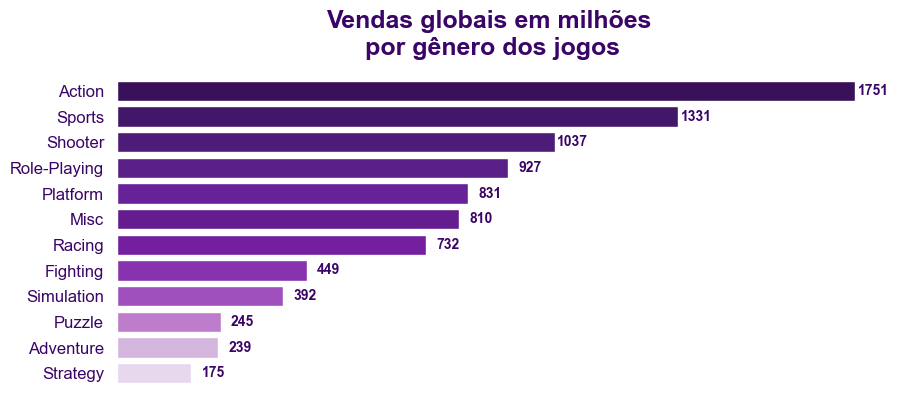

In [ ]:
boxplot_unico(df_top_generos, "Vendas_Globais", "Distribuição dos gêneros dos jogos\nem função das vendas")
grafico_barra(df_top_generos, 'Vendas_Globais', "Vendas globais em milhões \npor gênero dos jogos")